In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [2]:
titles = pd.read_csv('dataset/movies.csv')
print("Titles: {}".format(titles.shape))
titles.head()

Titles: (9742, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings = pd.read_csv('dataset/ratings.csv')
print("Ratings: {}".format(ratings.shape))
ratings.head()

Ratings: (100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
df = pd.merge(ratings,titles,on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [5]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

In [6]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [7]:
df_ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
df_ratings['ratingsCount'] = pd.DataFrame(df.groupby('title')['rating'].count())
df_ratings.head()

,rating,ratingsCount
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


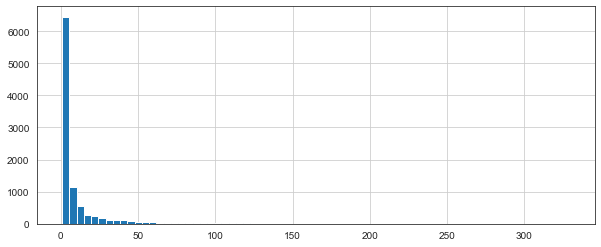

In [8]:
plt.figure(figsize=(10,4))
df_ratings['ratingsCount'].hist(bins=70)

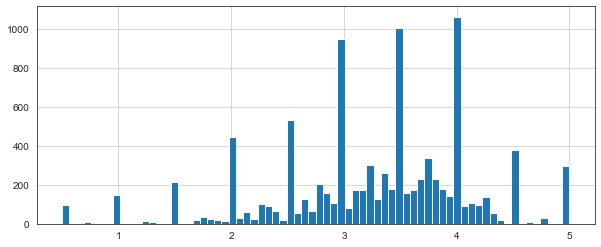

In [9]:
plt.figure(figsize=(10,4))
df_ratings['rating'].hist(bins=70)

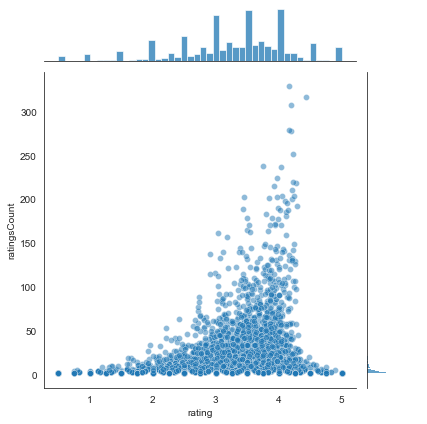

In [10]:
sns.jointplot(x='rating',y='ratingsCount',data=df_ratings,alpha=0.5)

In [11]:
moviematrix = df.pivot_table(index='userId',columns='title',values='rating')
moviematrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_ratings.sort_values('ratingsCount',ascending=False).head(10)

,rating,ratingsCount
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [13]:
def recommendation1(title):
    print('Recommendations for {}:\n'.format(title))
    movie_user_ratings = moviematrix[title]
    similar_to_movie = moviematrix.corrwith(movie_user_ratings)
    corr_movie = pd.DataFrame(similar_to_movie,columns=['Correlation'])
    corr_movie.dropna(inplace=True)
    corr_movie = corr_movie.join(df_ratings['ratingsCount'])
    corr_movie = corr_movie[corr_movie['ratingsCount']>100].sort_values('Correlation',ascending=False)
    corr_movie.reset_index(inplace=True)
    return corr_movie.iloc[1:11]

In [14]:
recommendation1('Forrest Gump (1994)')

Recommendations for Forrest Gump (1994):



c:\users\yashj\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\users\yashj\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,title,Correlation,ratingsCount
1,Good Will Hunting (1997),0.484042,141
2,Aladdin (1992),0.464268,183
3,American History X (1998),0.457287,129
4,"Truman Show, The (1998)",0.432556,125
5,Braveheart (1995),0.416976,237
6,Ferris Bueller's Day Off (1986),0.405830,109
7,Mrs. Doubtfire (1993),0.401408,144
8,Full Metal Jacket (1987),0.397241,102
9,Saving Private Ryan (1998),0.390074,188
10,Finding Nemo (2003),0.385565,141


In [15]:
recommendation1('Matrix, The (1999)')

Recommendations for Matrix, The (1999):



c:\users\yashj\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\users\yashj\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,title,Correlation,ratingsCount
1,Die Hard (1988),0.544466,145
2,Inception (2010),0.514767,143
3,Braveheart (1995),0.496045,237
4,Aliens (1986),0.470865,126
5,"Lion King, The (1994)",0.444932,172
6,"Monsters, Inc. (2001)",0.441205,132
7,Batman Begins (2005),0.440338,116
8,Jurassic Park (1993),0.427936,238
9,Fight Club (1999),0.417196,218
10,Spider-Man (2002),0.417009,122


### Using KNN

In [16]:
moviematrix = df.pivot_table(index='title',columns='userId',values='rating').fillna(0)
moviematrix.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
from scipy.sparse import csr_matrix
movie_features_df_matrix = csr_matrix(moviematrix.values)

In [18]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [19]:
moviematrix.shape

(9719, 610)

In [20]:
def reccomendation2(title):
    distances, indices = model_knn.kneighbors(moviematrix.loc[moviematrix.index == title,:].values.reshape(1, -1), n_neighbors = 6) 
    for i in range(0, len(distances.flatten())):
        if i == 0:
            print('Recommendations for {}:\n'.format(title))
        else:
            print('{0}: {1}, with distance of {2}:'.format(i, moviematrix.index[indices.flatten()[i]], distances.flatten()[i]))

In [21]:
reccomendation2('Forrest Gump (1994)')

Recommendations for Forrest Gump (1994):

1: Shawshank Redemption, The (1994), with distance of 0.287006938379163:
2: Jurassic Park (1993), with distance of 0.3117414283815536:
3: Pulp Fiction (1994), with distance of 0.3144563273687092:
4: Braveheart (1995), with distance of 0.3569100903432345:
5: Silence of the Lambs, The (1991), with distance of 0.3605374710888958:


In [22]:
reccomendation2('Matrix, The (1999)')

Recommendations for Matrix, The (1999):

1: Fight Club (1999), with distance of 0.2860625732802825:
2: Star Wars: Episode V - The Empire Strikes Back (1980), with distance of 0.29906523379388084:
3: Saving Private Ryan (1998), with distance of 0.3203850301290394:
4: Star Wars: Episode IV - A New Hope (1977), with distance of 0.3365532537559339:
5: Star Wars: Episode VI - Return of the Jedi (1983), with distance of 0.3390155103982786:
